# Notebook for Plotting Distillation Figures

This notebook contains the code for plotting the disillation figures, based on data provided. This notebook does not include the analysis scripts for the data.

In [1]:
import os
import random
import time
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import gridspec
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

%config InlineBackend.figure_format = 'retina'

try:
    plt.style.use(os.path.expanduser('../plot.mplstyle'))
    print("single_column.mplstyle loaded")
except:
    print("Warning: Could not load single_column.mplstyle from Downloads")

single_column.mplstyle loaded


# Timing Figure

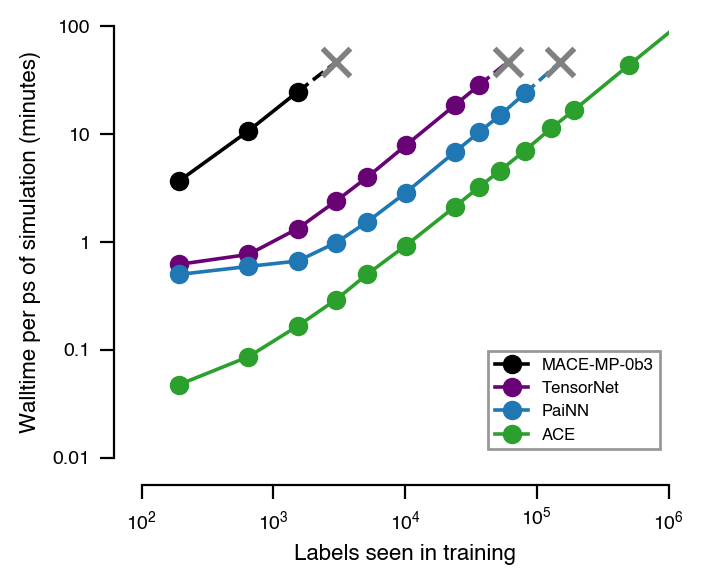

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

new_df = pd.read_csv("../data/timing.csv")

colours = {"MACE-MP-0b3": "k", "TensorNet": "#690375", "PaiNN": "C0", "ACE": "C2"}

for model, c in colours.items():
    _sub = new_df[new_df["model"] == model].sort_values("molecules")
    plt.plot(_sub["molecules"] * 3, _sub["mins_per_ps"], "-o", label=model, c=c)

for (a, b), (x, y), model in [
    ((512, 1000), (372, 700), "FM"),
    ((12167, 20000), (427, 700), "TensorNet"),
    ((27000, 50000), (358, 700), "PaiNN"),
    # ((81e6 / 3, 140e6 / 3), (2787 * 15, 5000 * 15), "ACE"),
]:
    plt.plot(
        [a * 3, b * 3],
        [x * 4 / 60, y * 4 / 60],
        "--",
        color=colours.get(model, "k"),
    )
    oom = plt.scatter(
        [b * 3],
        [y * 4 / 60],
        color="grey",
        marker="x",
        zorder=10,
        lw=2,
        s=100,
    )


plt.xscale("log")
plt.yscale("log")
plt.xlim(1e2, 1e6)
# Set y-axis ticks to natural numbers instead of log format
plt.yticks([0.01, 0.1, 1, 10, 100], ['0.01', '0.1', '1', '10', '100'])
plt.ylim(1e-2, 1e2)
plt.minorticks_off()
plt.ylabel("Walltime per ps of simulation (minutes)")
plt.xlabel("Labels seen in training")
# Get the current axes object and use its spines instead of plt.spines
ax = plt.gca()
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_position(("outward", 10))

# Remove the incorrect plt.spines lines
plt.ylabel("Walltime per ps of simulation (minutes)")
plt.xlabel("Labels seen in training")
plt.legend(fancybox=False)
plt.savefig("timing.pdf", dpi=300, bbox_inches="tight")

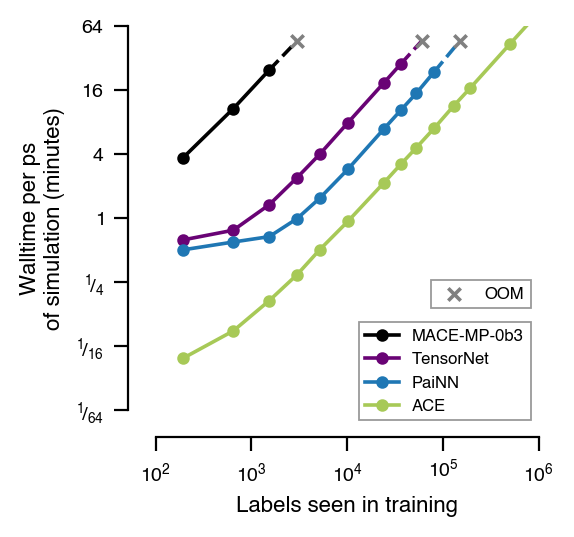

In [3]:
new_df = pd.read_csv("../data/timing.csv")
colours = {"MACE-MP-0b3": "k", "TensorNet": "#690375", "PaiNN": "C0", "ACE": "#a7c957"}

for model, c in colours.items():
    _sub = new_df[new_df["model"] == model].sort_values("molecules")
    # Set markersize for circle markers to 6.5
    plt.plot(_sub["molecules"] * 3, _sub["mins_per_ps"], "-o", markersize=3.5, label=model, c=c)
    # continue  # Skip the default plot command below
    # plt.plot(_sub["molecules"] * 3, _sub["mins_per_ps"], "-o", label=model, c=c)

legend = plt.legend(fancybox=False, bbox_to_anchor=(1.00, 0.25))
legend.get_frame().set_linewidth(0.65)
 
for (a, b), (x, y), model in [
    ((512, 1000), (372, 700), "FM"),
    ((12167, 20000), (427, 700), "TensorNet"),
    ((27000, 50000), (358, 700), "PaiNN"),
    # ((81e6 / 3, 140e6 / 3), (2787 * 15, 5000 * 15), "ACE"),
]:
    plt.plot(
        [a * 3, b * 3],
        [x * 4 / 60, y * 4 / 60],
        "--",
        color=colours.get(model, "k"),
    )
    oom = plt.scatter(
        [b * 3],
        [y * 4 / 60],
        color="grey",
        marker="x",
        zorder=10,
        lw=1.3,
        s=20,
        clip_on=False,
    )
 
b = plt.legend(
    [oom],
    ["OOM"],
    fancybox=False,
    bbox_to_anchor=(1.00, 0.36),
    # loc="center left",
)
b.get_frame().set_linewidth(0.65)

plt.gca().add_artist(legend)
plt.xscale("log")
plt.yscale("log", base=4)
plt.xlim(1e2, 1e6)
# Set y-axis ticks to natural numbers instead of log format
plt.yticks([1/64, 1/16, 1/4, 1, 4, 16, 64], [r'$\mathrm{^{1}\!/_{64}}$', r'$\mathrm{^{1}\!/_{16}}$', r'$\mathrm{^{1}\!/_{4}}$', r'$\mathrm{1}$', r'$\mathrm{4}$', r'$\mathrm{16}$', r'$\mathrm{64}$'])
plt.ylim(1/64, 64)
plt.minorticks_off()
plt.ylabel("Walltime per ps\n"
           "of simulation (minutes)")
plt.xlabel("Labels seen in training")
# Get the current axes object and use its spines instead of plt.spines
ax = plt.gca()
# ax.set_aspect('equal')

# Set the aspect ratio to be equal (square plot)
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_position(("outward", 10))
aspect_ratio = (np.log10(1e6) - np.log10(1e2)) /  (np.emath.logn(4,64) - np.emath.logn(4,1/64))
ax.set_aspect(aspect_ratio, adjustable='box')
plt.tight_layout()
plt.gcf().set_size_inches(3.34646, 2.8)

# plt.legend(edgecolor='grey')
plt.savefig("timing.svg", dpi=300)

# Water Validation Figure

## Panel 1

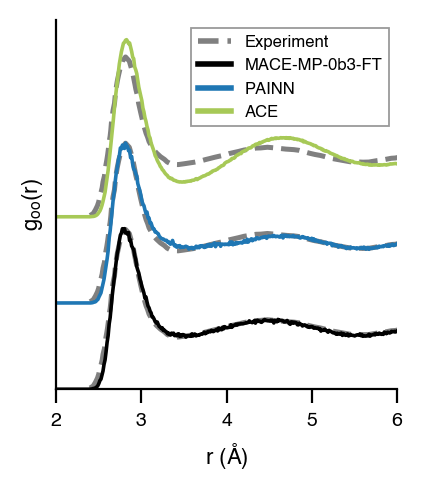

In [4]:
exp_rdf = pd.read_csv("../data/water/oo_exp_rdf.csv")
painn_rdf = np.loadtxt("../data/water/water-painn-rdf.txt")
foundation_rdf = np.loadtxt("../data/water/water-foundation-rdf.txt")
ace_rdf = np.loadtxt("../data/water/water-ace-rdf.txt")

plot_colours = ["pink", "k", "C0", "#a7c957"]

fig, ax = plt.subplots(figsize=(2.1, 2.2))
ax.plot(exp_rdf['x'], [i for i in exp_rdf['Curve1'] + 2.8], linestyle="dashed", c='gray', label='Experiment', lw=1.8)
ax.plot(exp_rdf['x'], [i for i in exp_rdf['Curve1'] + 1.4], linestyle="dashed", c='gray', lw=1.8)
ax.plot(exp_rdf['x'], [i for i in exp_rdf['Curve1']], linestyle="dashed", c='gray', lw=1.8)# linestyle="dashed", 
ax.plot(foundation_rdf[:,0], [i for i in foundation_rdf[:,1]], label="MACE-MP-0b3-FT", c=plot_colours[1])
ax.plot(painn_rdf[:,0], [i for i in painn_rdf[:,1] + 1.4], label="PAINN", c=plot_colours[2])
ax.plot(ace_rdf[:,0], [i for i in ace_rdf[:,1] + 2.8], label="ACE", c=plot_colours[3])
# ax.plot(exp_rdf['x'], [i for i in exp_rdf['Curve1'] - 1], linestyle="dashed", label="Experiment", c='k')
ax.set_xlim(2, 6)
ax.set_ylim(-0, 6)
ax.set_xlabel("$r$ (Å)")
ax.set_ylabel("$g_{\mathrm{oo}}(r)$")
ax.set_yticks([])

# Now we can properly access and modify the spines
# ax.spines["bottom"].set_position(("outward", 10))
# ax.spines["left"].set_position(("outward", 10))

plt.gcf().set_size_inches(2.2, 2.4)
leg = ax.legend()
leg.get_frame().set_linewidth(0.65)
for line in leg.get_lines():
    line.set_linewidth(2)
plt.savefig("H2O-pane-1.pdf", dpi=300, transparent=True, bbox_inches="tight")

## Panel 2

1000
1000


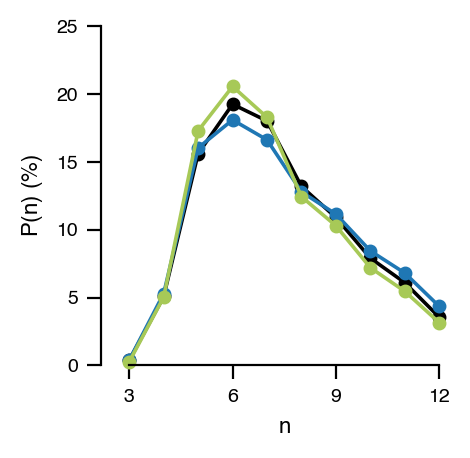

In [5]:
temps = [300]

rows_per_structure = 10

fig, ax = plt.subplots(figsize=(2, 2.2))
for i, t in enumerate(temps):
    df2 = pd.read_csv(f"../data/water/foundation-NVE.dat", delim_whitespace=True, header=None, names=["n", "Count"])[-1000:]
    df2['Structure'] = df2.index // rows_per_structure
    df2['P(n)'] = df2.groupby('Structure')['Count'].transform(lambda x: x / x.sum()*100)
    df2_avg = df2.groupby('n')['P(n)'].mean().reset_index()
    plt.plot(df2_avg['n'], df2_avg['P(n)'], marker='o', linestyle='-', color='black',clip_on=False,label='MACE-MP-0b3', ms=4)

    df = pd.read_csv(f"../data/water/painn-NVE.dat", delim_whitespace=True, header=None, names=["n", "Count"])[-1000:]
    print(len(df))
    df['Structure'] = df.index // rows_per_structure
    df['P(n)'] = df.groupby('Structure')['Count'].transform(lambda x: x / x.sum()*100)
    df_avg = df.groupby('n')['P(n)'].mean().reset_index()
    plt.plot(df_avg['n'], df_avg['P(n)'], marker='o', linestyle='-', color='C0',clip_on=False,label='PaiNN', ms=4)

    df3 = pd.read_csv(f"../data/water/ace-last100-NVE-rings.dat", delim_whitespace=True, header=None, names=["n", "Count"])
    print(len(df3))
    df3['Structure'] = df3.index // rows_per_structure
    df3['P(n)'] = df3.groupby('Structure')['Count'].transform(lambda x: x / x.sum()*100)
    df3_avg = df3.groupby('n')['P(n)'].mean().reset_index()
    plt.plot(df3_avg['n'], df3_avg['P(n)'], marker='o', linestyle='-', color='#a7c957',clip_on=False,label='ACE', ms=4)
    
plt.xlabel("$n$")
plt.ylabel("$P(n)$ (%)")
plt.ylim(bottom=0)
# x = plt.legend(loc='upper right', bbox_to_anchor=(1.2,0.95))
# x.get_frame().set_linewidth(0.65)
plt.xlim(3, 12)
plt.xticks([3, 6, 9, 12])
#plt.gcf().set_size_inches(1.9, 1.8)
# plt.grid(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_position(("outward", 10))
plt.savefig('H2O-pane-2.pdf', dpi=300, transparent=True, bbox_inches="tight")


## Panel 3

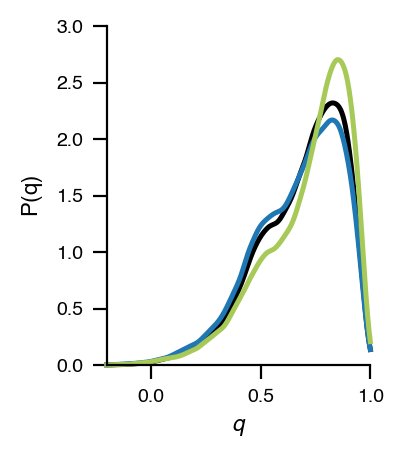

In [6]:
foundation_qs = np.load("../data/water/foundation_qs.npy")
painn_qs = np.load("../data/water/painn_qs.npy")
ace_qs = np.load("../data/water/ace_qs.npy")

# fig,ax = plt.subplots(figsize=(2.7, 2.3))
model_names = ["MACE-MP-0b3", "PaiNN", "ACE"]
colours = ["black", "C0", "#a7c957"]

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 1, figsize=(1.7, 2.2))

kde_range = np.linspace(-0.2, 1.0, 1000)
for data, color in zip([foundation_qs, painn_qs, ace_qs], colours):
    density = gaussian_kde(data)
    ax.plot(kde_range, density(kde_range), color=color, linewidth=1.8, clip_on=False)
ax.set_xlim(-0.2, 1.0)
ax.set_ylim(0, 3)
ax.set_xlabel('$\it{q}$')
ax.set_ylabel('$P(q)$')
# ax.spines["left"].set_position(("outward", 10))

plt.savefig("tetrahedral_order.pdf", dpi=300, transparent=True, bbox_inches="tight")

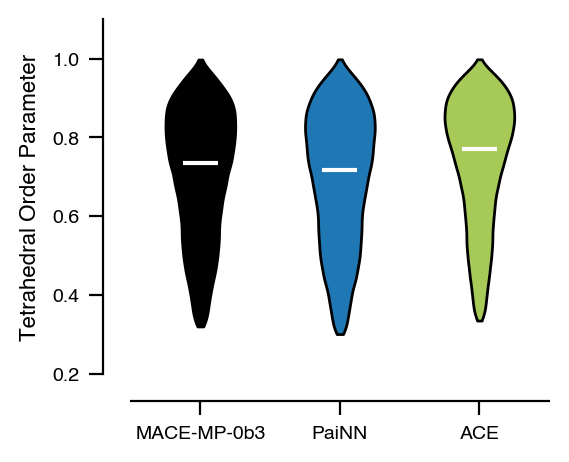

In [7]:
foundation_qs = np.load("../data/water/foundation_qs.npy")
painn_qs = np.load("../data/water/painn_qs.npy")
ace_qs = np.load("../data/water/ace_qs.npy")

fig,ax = plt.subplots(figsize=(2.7, 2.3))
model_names = ["MACE-MP-0b3", "PaiNN", "ACE"]
colours = ["black", "C0", "#a7c957"]
# plot a violin plot of the q values for each model
# Create violin plots for each model
# Create violin plots for each model with clipped data
# Calculate 5th and 95th percentiles for each dataset
foundation_lower, foundation_upper = np.percentile(foundation_qs, [5, 100])
painn_lower, painn_upper = np.percentile(painn_qs, [5, 100])
ace_lower, ace_upper = np.percentile(ace_qs, [5, 100])

# Filter out data points below 5th and above 95th percentiles
# Filter out outliers using the 5th and 95th percentiles
foundation_qs_filtered = foundation_qs[(foundation_qs >= foundation_lower) & (foundation_qs <= foundation_upper)]
painn_qs_filtered = painn_qs[(painn_qs >= painn_lower) & (painn_qs <= painn_upper)]
ace_qs_filtered = ace_qs[(ace_qs >= ace_lower) & (ace_qs <= ace_upper)]

# Use the filtered data for the violin plots
foundation_qs_clipped = foundation_qs_filtered
painn_qs_clipped = painn_qs_filtered
ace_qs_clipped = ace_qs_filtered


parts = ax.violinplot([foundation_qs_clipped, painn_qs_clipped, ace_qs_clipped], positions=[0, 1, 2], 
                     showmeans=False, showmedians=True, showextrema=False)

# Customize violin plots with appropriate colors
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colours[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

# Add median lines
parts['cmedians'].set_color('white')
parts['cmedians'].set_linewidth(1.5)

# plt.boxplot(foundation_qs, positions=[0], showfliers=False, widths=0.7, boxprops=dict(facecolor=colours[0]), patch_artist=True, medianprops=dict(color="white", solid_capstyle='butt'), whis=[10, 90])
# plt.boxplot(painn_qs, positions=[1], showfliers=False, widths=0.7, boxprops=dict(facecolor=colours[1]), patch_artist=True, medianprops=dict(color="white", solid_capstyle='butt'), whis=[10, 90])
# plt.boxplot(ace_qs, positions=[2], showfliers=False, widths=0.7, boxprops=dict(facecolor=colours[2]), patch_artist=True, medianprops=dict(color="white", solid_capstyle='butt'), whis=[10, 90])
# plt.legend(["MACE-MP-0b3", "PaiNN", "ACE"], bbox_to_anchor=(1, 1))

plt.xticks([0, 1, 2], model_names)
ax.set_ylabel("Tetrahedral Order Parameter")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position(("outward", 10))
ax.spines["left"].set_position(("outward", 10))
plt.savefig("tetrahedral_order_violin.pdf", dpi=300, transparent=True, bbox_inches="tight")

## Panel 4

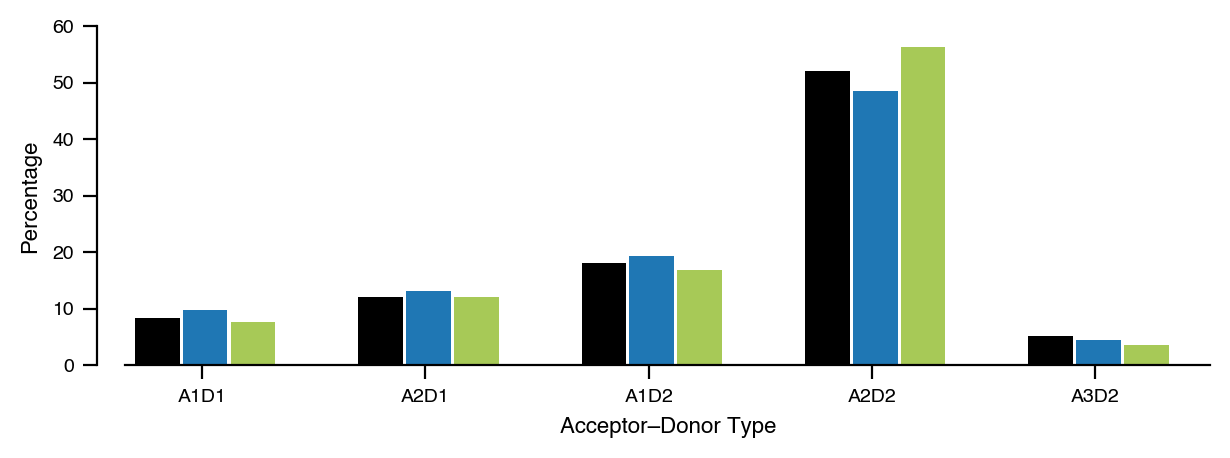

In [8]:
df = pd.read_csv("../data/water/hbond.csv")

desired_types = ["A1D1", "A2D1", "A1D2", "A2D2", "A3D2"]
fig, ax = plt.subplots(figsize=(7, 2.2))

# colours = ["black", "C0", "#a7c957"]
colours = {"foundation": "black", "painn": "C0", "ace": "#a7c957"}

for i, (model, colour) in enumerate(colours.items()):
    x = np.arange(len(desired_types)) * (len(colours) + 0.5) + 0.75*i
    y = df[df["model"] == model]["percentage"]
    # y = [decomp.get(t, 0) for t in desired_types]
    plt.bar(x, y, color=colour, width=0.7)

plt.xticks(x - len(colours) / 2 + 0.7, desired_types)
plt.xlabel("Acceptor"+ "\u2013" + "Donor Type")
plt.ylabel("Percentage")
plt.ylim(bottom=0,top=60)
plt.xlim(-0.5, 16.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.gcf().set_size_inches(2.4, 1.9)
ax.spines["left"].set_position(("outward", 10))
plt.savefig('H2O-pane-3.pdf', dpi=300, transparent=True, bbox_inches="tight")

# Ablation Figures & Figure 1b

In [9]:
# Load data and define colours
df = pd.read_csv("../data/res.csv").dropna()
# Create a new column for the Labels seen in training
df["n_labels"] = df.N * 193

ace_results = pd.read_csv(
    "../data/ace.csv",
    names=[
        "Name",
        "State",
        "CUTOFF",
        "FM",
        "N",
        "SEED",
        "ARCH",
        "test/dft-test/forces_mae",
        "test/dft-test/per_atom_energy_mae",
        "test/dft-test-fm/forces_mae",
        "test/dft-test-fm/per_atom_energy_mae",
    ],
)
ace_results["CUTOFF"] = 4.5
ace_results.N = ace_results.N.astype(int)
ace_results["n_labels"] = ace_results.N * 193
df = pd.concat([df, ace_results])

eddp_results = pd.read_csv("../data/eddp.csv", names=[
        "n_atoms",
        "test/dft-test/per_atom_energy_mae",
        "test/dft-test/forces_mae",
        "test/dft-test-fm/per_atom_energy_mae",
        "test/dft-test-fm/forces_mae",
    ])
eddp_results["ARCH"] = "EDDP"
eddp_results["CUTOFF"] = 4.5
eddp_results["FM"] = "MP03b"
eddp_results["n_labels"] = eddp_results.n_atoms // 24
eddp_results["N"] = eddp_results.n_labels // 193
eddp_results.n_labels = eddp_results.n_labels.astype(int)
df = pd.concat([df, eddp_results])

colours = {
    "PaiNN": "C0",
    "ACE": "#a7c957",
    "SchNet": "C8",
    "TensorNet": "#690375",
    "EDDP": "#FFA928",
    #"EDDP": 'black'
}

df.tail()

,Name,State,N,CUTOFF,ARCH,FM,SEED,test/dft-test-fm/forces_mae,test/dft-test/forces_mae,test/valid/forces_mae,test/dft-test-fm/per_atom_energy_mae,n_labels,test/dft-test/per_atom_energy_mae,n_atoms
0,NaN,NaN,4,4.5,EDDP,MP03b,NaN,0.341950,0.343858,NaN,0.005356,900,0.005750,21600.0
1,NaN,NaN,13,4.5,EDDP,MP03b,NaN,0.212926,0.214932,NaN,0.003935,2700,0.004336,64800.0
2,NaN,NaN,46,4.5,EDDP,MP03b,NaN,0.118406,0.120651,NaN,0.003658,9000,0.003934,216000.0
3,NaN,NaN,139,4.5,EDDP,MP03b,NaN,0.091360,0.094454,NaN,0.005168,27000,0.005615,648000.0
4,NaN,NaN,466,4.5,EDDP,MP03b,NaN,0.076998,0.080312,NaN,0.001434,90000,0.001907,2160000.0


ARCH,ACE,EDDP,PaiNN,TensorNet
n_labels,,,,
900,0,1,0,0
2700,0,1,0,0
9000,0,1,0,0
19300,3,0,3,4
27000,0,1,0,0
64269,3,0,3,4
90000,0,1,0,0
193000,3,0,3,4
643269,3,0,3,3


CUTOFF,2.5,3.0,3.5,4.0,4.5,5.5
N,,,,,,
100,1,3,2,3,3,2
333,1,3,2,3,3,2
1000,1,3,2,3,3,2
3333,1,3,2,3,3,1
10000,3,3,3,3,2,3


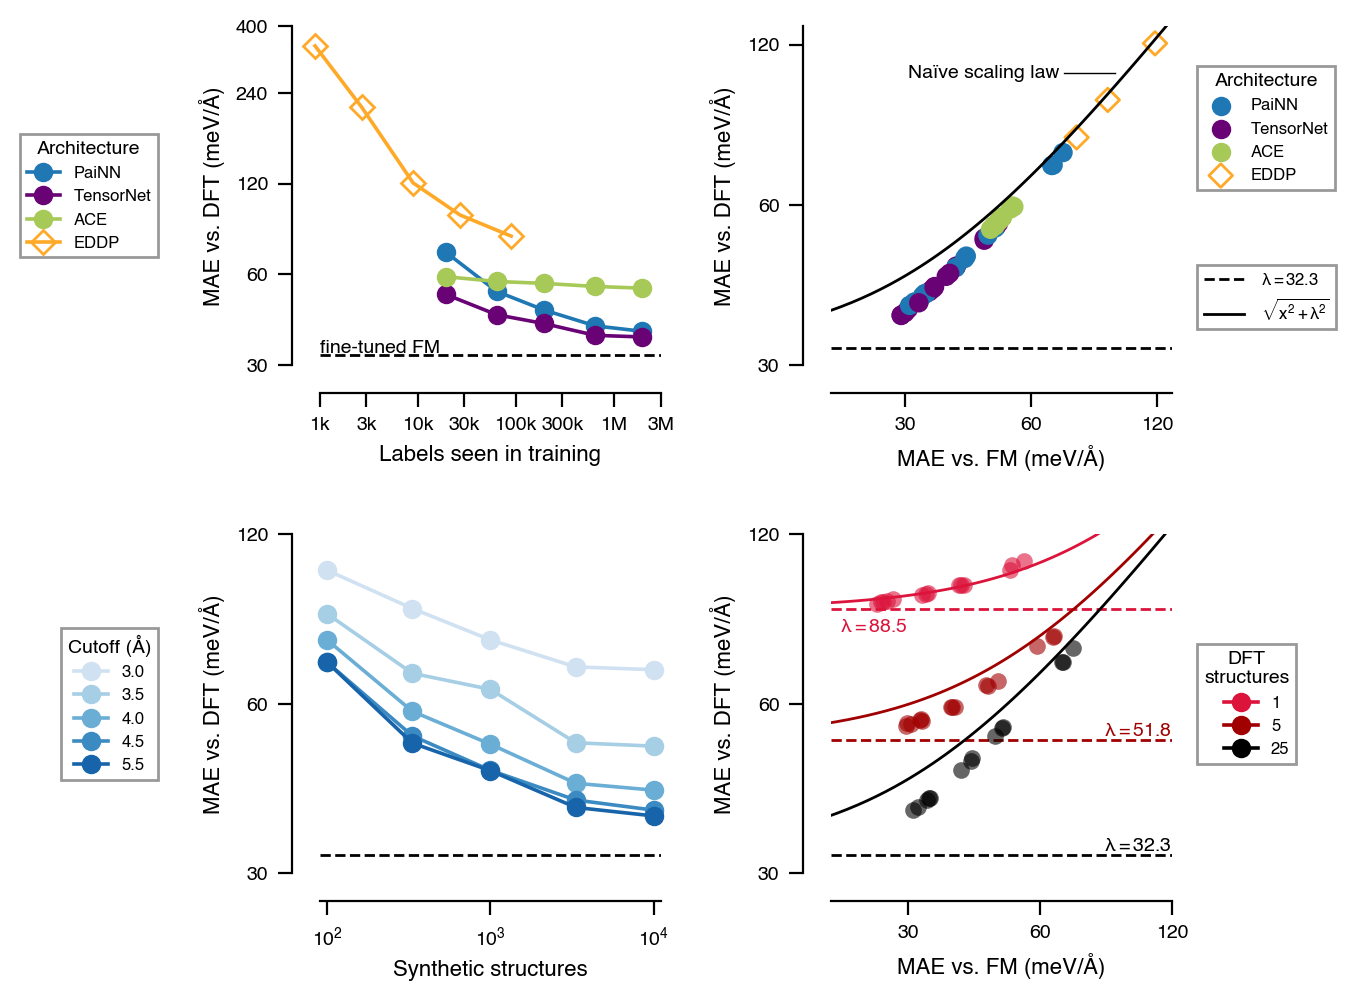

In [10]:
FM_ACC = 32.3
ARCHS = ["PaiNN", "TensorNet", "ACE", "EDDP"]

fig, axs = plt.subplots(
    2, 2, figsize=(5.5, 5.5), gridspec_kw={"wspace": 0.5, "hspace": 0.5}
)

# top left: learning curves for different architectures
sub = df[
    (df.CUTOFF == 4.5)
    & (df.FM == "MP03b")
    & (df.N <= 1.3e4)
    & (df.ARCH.isin(ARCHS))
]

display(
    pd.pivot_table(
        sub,
        values="test/dft-test/forces_mae",
        index=["n_labels"],
        columns=["ARCH"],
        aggfunc="count",
    ).replace(np.nan, 0).astype(int)
)

plt.sca(axs[0, 0])

for arch in ARCHS:
    sub_arch = (
        sub[sub.ARCH == arch]
        .groupby("n_labels")
        .min(numeric_only=True)
        .reset_index()
    )
    if arch == "EDDP":
        plt.plot(
            sub_arch["n_labels"],
            sub_arch["test/dft-test/forces_mae"] * 1000,
            "-D",
            label=f"{arch}",
            c=colours[arch],
            clip_on=False,
            fillstyle="none",
        )
    else:
        plt.plot(
            sub_arch["n_labels"],
            sub_arch["test/dft-test/forces_mae"] * 1000,
            "-o",
            label=f"{arch}",
            c=colours[arch],
            clip_on=False,
        )
plt.axhline(FM_ACC, c="k", linestyle="--", lw=1)
plt.text(1000, FM_ACC * 1.02, "fine-tuned FM", size=7)
plt.legend(
    title="Architecture",
    bbox_to_anchor=(-0.45, 0.5),
    loc="center right",
    fancybox=False,
)
plt.xlabel("Labels seen in training")
plt.ylabel("MAE vs. DFT (meV/Å)")
plt.xscale("log")
plt.yscale("log")
plt.yticks([30, 60, 120, 240, 400], ["30", "60", "120", "240", "400"])
#plt.yticks([30, 60, 120], ["30", "60", "120"])
plt.xticks([1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000], ["1k", "3k", "10k", "30k", "100k", "300k", "1M", "3M"])
plt.xlim(1000, 3000000)
# plt.yticks([25, 50, 100, 200], ["25", "50", "100", "200"])
plt.ylim(30, 400)
# plt.ylim(30, 120)
for dir in "top", "right":
    plt.gca().spines[dir].set_visible(False)
for dir in "left", "bottom":
    plt.gca().spines[dir].set_position(("outward", 10))
plt.minorticks_off()

# bottom left: learning curves for different cutoffs
sub = df[(df.ARCH == "PaiNN") & (df.FM == "MP03b") & (df.N <= 1e4)]

display(
    pd.pivot_table(
        sub,
        values="test/dft-test/forces_mae",
        index=["N"],
        columns=["CUTOFF"],
        aggfunc="count",
    )
)
plt.sca(axs[1, 0])
cutoffs = (3, 3.5, 4, 4.5, 5.5)
blues = plt.cm.Blues(np.linspace(0.2, 0.8, len(cutoffs)))
for cutoff, blue in zip(cutoffs, blues):
    sub_cutoff = sub[sub.CUTOFF == cutoff].groupby("N").min().reset_index()
    plt.plot(
        sub_cutoff["N"],
        sub_cutoff["test/dft-test/forces_mae"] * 1000,
        "-o",
        label=f"{cutoff:.1f}",
        c=blue,
        clip_on=False,
    )
plt.axhline(FM_ACC, c="k", linestyle="--", lw=1)
plt.legend(
    title="Cutoff (Å)",
    bbox_to_anchor=(-0.45, 0.5),
    loc="center right",
    fancybox=False,
)
plt.xlabel("Synthetic structures")
plt.ylabel("MAE vs. DFT (meV/Å)")
plt.xscale("log")
plt.yscale("log")
plt.yticks([30, 60, 120], ["30", "60", "120"])
# plt.yticks([25, 50, 100, 200], ["25", "50", "100", "200"])
plt.ylim(30, 120)
# plt.xticks([1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000], ["1k", "3k", "10k", "30k", "100k", "300k", "1M", "3M"])
# plt.xlim(1000, 3000000)
plt.xlim(1e2-1e1, 1e4+1e3)
for dir in "top", "right":
    plt.gca().spines[dir].set_visible(False)
for dir in "left", "bottom":
    plt.gca().spines[dir].set_position(("outward", 10))
plt.minorticks_off()

# top right: FM-vs-DFT for MP03b
plt.sca(axs[0, 1])
M = 130
sub = df[
    (df.CUTOFF == 4.5)
    & (df.FM == "MP03b")
    & (df.N <= 1e4)
    & (df["test/dft-test/forces_mae"] <= M / 1e3)
    & (df.ARCH.isin(ARCHS))
]
# remove EDDP from sub
eddp_sub = sub[sub.ARCH == "EDDP"]
sub = sub[sub.ARCH != "EDDP"]
plt.scatter(
    sub["test/dft-test-fm/forces_mae"] * 1000,
    sub["test/dft-test/forces_mae"] * 1000,
    c=sub["ARCH"].map(colours),
    marker="o",  # Use a single marker style
    clip_on=False,
)

for arch in ARCHS:
    if arch == "EDDP":
        # For EDDP, create a legend entry with an empty diamond marker
        plt.scatter([], [],
                    marker='D',
                    facecolors='none',
                    edgecolors=colours["EDDP"], # Use the specific color for EDDP edge
                    label=arch)
    else:
        # For other architectures, use a filled circle
        plt.scatter([], [],
                    marker='o', # Explicitly 'o' for clarity
                    c=colours[arch], # This will set facecolor for a filled circle
                    label=arch)

# Create separate scatter points for EDDP with diamond markers
if not eddp_sub.empty:
    plt.scatter(
        eddp_sub["test/dft-test-fm/forces_mae"] * 1000,
        eddp_sub["test/dft-test/forces_mae"] * 1000,
        edgecolors=colours["EDDP"],
        facecolors="none",
        marker="D",
        clip_on=False,
    )

leg1 = plt.legend(
    bbox_to_anchor=(1.05, 0.7),
    loc="center left",
    fancybox=False,
    title="Architecture",
)



l1 = plt.axhline(FM_ACC, c="k", linestyle="--", lw=1)
xx = np.linspace(0, M, 100)
yy = np.sqrt(FM_ACC**2 + xx**2)
l2 = plt.plot(xx, yy, c="k", linestyle="-", lw=1)

# 45 degrees text 
# plt.text(20, 40, "Naïve scaling law", ha="left", va="bottom", rotation=35, fontsize=8)
plt.text(70, 110, "Naïve scaling law", ha="right", va="top", fontsize=7)
plt.plot([72,95], [106, 106], c="k", linestyle="-", lw=0.5)

plt.legend(
    [l1, l2[0]],
    [rf"$\lambda = {FM_ACC}$", rf"$\sqrt{{x^2 + \lambda^2}}$"],
    bbox_to_anchor=(1.05, 0.2),
    loc="center left",
    fancybox=False,
    handlelength=2.4,
    handletextpad=1,
)
plt.gca().add_artist(leg1)

plt.xlabel("MAE vs. FM (meV/Å)")
plt.ylabel("MAE vs. DFT (meV/Å)")

plt.yscale("log")
plt.xscale("log")
ticks = [30, 60, 120, 200]
plt.xticks(ticks, [str(t) for t in ticks])
plt.yticks(ticks, [str(t) for t in ticks])
plt.minorticks_off()
plt.xlim(20, M)
plt.ylim(30, M)

for dir in "top", "right":
    plt.gca().spines[dir].set_visible(False)
for dir in "left", "bottom":
    plt.gca().spines[dir].set_position(("outward", 10))


# bottom right: FM-vs-DFT for PaiNN

plt.sca(axs[1, 1])
M = 120
sub = df[
    (df.CUTOFF == 4.5)
    & (df.ARCH == "PaiNN")
    & (df.N <= 1e4)
    & (df["test/dft-test/forces_mae"] <= M / 1e3)
]

results = {
    "MP03b-n1": (88.5, 1, "crimson"),
    "MP03b-n5": (51.8, 5, "#a00000"),
    "MP03b": (32.3, 25, "black"),
}

for fm, (acc, shots, c) in results.items():
    sub_fm = sub[sub.FM == fm]
    plt.scatter(
        sub_fm["test/dft-test-fm/forces_mae"] * 1000,
        sub_fm["test/dft-test/forces_mae"] * 1000,
        c=c,
        lw=0,
        alpha=0.6,
        zorder=shots,
        clip_on=False,
    )
    plt.axhline(acc, c=c, linestyle="--", lw=1, zorder=shots)
    xx = np.linspace(0, M, 100)
    yy = np.sqrt(acc**2 + xx**2)
    plt.plot(xx, yy, c=c, linestyle="-", lw=1, zorder=shots)
    if shots == 1:
        plt.text(21, acc - 3, rf"$\lambda = {acc}$", ha="left", va="top", c=c, size=7)
    else:
        plt.text(M, acc, rf"$\lambda = {acc}$", ha="right", va="bottom", c=c, size=7)
    plt.plot([], [], "-o", c=c, label=shots)

legend = plt.legend(
    title="DFT\nstructures",
    title_fontsize=7,
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    fancybox=False,
    alignment="right",
)
legend.get_title().set_multialignment('center')
plt.xlabel("MAE vs. FM (meV/Å)")
plt.ylabel("MAE vs. DFT (meV/Å)")
plt.xlim(20, M)
plt.ylim(30, M)
plt.yscale("log")
plt.xscale("log")
ticks = [30, 60, 120]
plt.xticks(ticks, [str(t) for t in ticks])
plt.yticks(ticks, [str(t) for t in ticks])
plt.minorticks_off()

for dir in "top", "right":
    plt.gca().spines[dir].set_visible(False)
for dir in "left", "bottom":
    plt.gca().spines[dir].set_position(("outward", 10))

plt.savefig("ablations-mae.pdf", dpi=300, bbox_inches="tight", transparent=True)

,ARCH,test/dft-test/forces_mae
0,ACE,0.053963
1,PaiNN,0.038818
2,SchNet,0.087011
3,TensorNet,0.037161


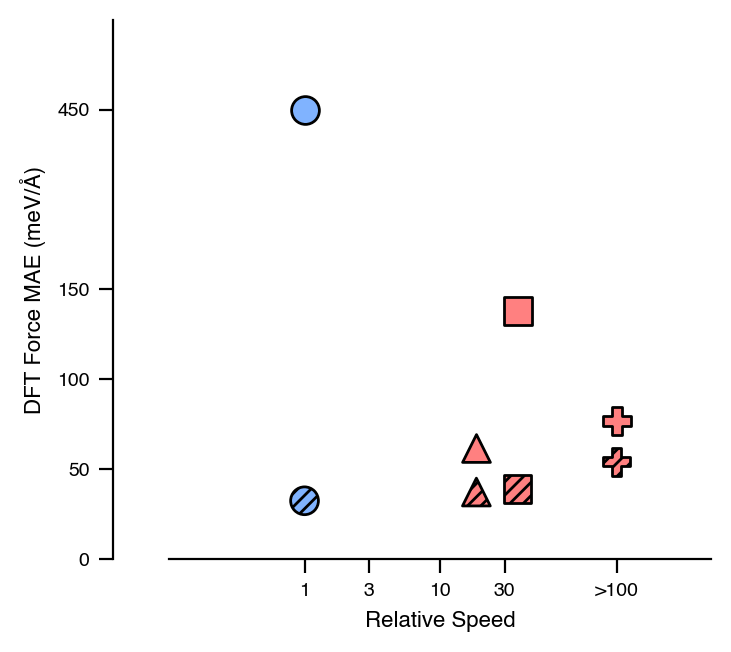

In [11]:
sub = df[(df.CUTOFF == 4.5) & (df.FM == "MP03b") & (df.N == 10_000)]

display(
    sub.groupby("ARCH").agg({"test/dft-test/forces_mae": "min"}).reset_index()
)

speeds = {"TensorNet": 18.5, "PaiNN": 37.2, "ACE": 200}
shapes = {"TensorNet": "^", "PaiNN": "s", "ACE": "P"}
# update the accuracy of the direct models here
direct_accs = {"TensorNet": 61.6, "PaiNN": 138.1, "ACE": 76.8}

FM_colour = "#80b3ffff"
distill_colour = "#ff8080ff"

FM_ACC = 32.3
SPLIT_WIDTH = 150
_ace_acc = 50

plt.figure(figsize=(3.5, 3.5))

plt.scatter(1, 250, c=FM_colour, marker="o", s=100, edgecolor="black")
plt.scatter(1, FM_ACC, c=FM_colour, marker="o", s=100, edgecolor="black", hatch="/////",)

for model, speed in speeds.items():
    y = sub[sub.ARCH == model]["test/dft-test/forces_mae"].min() * 1000
    plt.scatter(
        speed,
        y,
        c=distill_colour,
        marker=shapes[model],
        s=100,
        edgecolor="black",
        hatch="/////",
    )
    plt.scatter(
        speed,
        direct_accs[model],
        c=distill_colour,
        marker=shapes[model],
        s=100,
        edgecolor="black",
    )

plt.xscale("log")
ticks = [1, 3, 10, 30, 200]
plt.xticks(ticks, ["1", "3", "10", "30", ">100"])

# plt.yscale("log")
ticks = [0, 50, 100, 150, 250]
plt.yticks(ticks, ticks[:-1] + [450])

for dir in "top", "right":
    plt.gca().spines[dir].set_visible(False)
# for dir in "left", "bottom":
plt.gca().spines["left"].set_position(("outward", 20))

plt.minorticks_off()
plt.xlabel("Relative Speed")
plt.ylabel("DFT Force MAE (meV/Å)")

plt.savefig("speed-acc-mae.svg", bbox_inches="tight", transparent=True)

# Application Figure

## Porous Silica

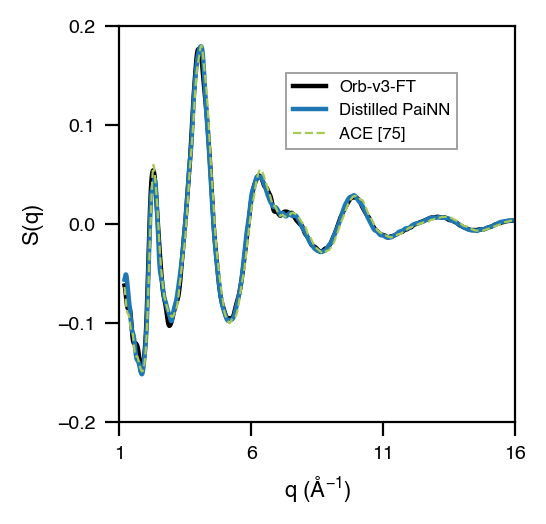

In [12]:
models=['Orb-v3-FT', 'Distilled PaiNN', 'ACE [X]']
colors=["k", "C0", '#a7c957']
 
inds=np.arange(0,4)
fig = plt.figure(figsize=(2.2, 2.2))
axes = fig.add_subplot(111)

axes.set_position((0, 0, 0.9, 0.9))

for model, color in zip(models, colors):
    q,sq=np.loadtxt(f'../data/Sq-{model}.txt')
    if model == "ACE [X]":
        axes.plot(q, sq, label='ACE [75]', c=color, ls='--', lw=0.8)
    else:
        axes.plot(q, sq, label=f'{model}', c=color, ls='-', lw=1.6)

 
# axes.spines["bottom"].set_position(("outward", 10))
# axes.spines["left"].set_position(("outward", 10))
legend = axes.legend(bbox_to_anchor=(0.4, 0.67), loc="lower left", fancybox=False)
legend.get_frame().set_linewidth(0.65)
axes.set_xlabel('$q~(\mathrm{Å}^{-1}$)')
axes.set_xlim(1, 16)
axes.set_xticks([1, 6, 11, 16])
axes.set_ylabel('S($q$)')
axes.set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
axes.spines['top'].set_visible(True)
axes.spines['right'].set_visible(True)
# plt.gcf().set_size_inches(1.9, 1.9)
fig.savefig('Sq_v2.pdf', dpi=300, bbox_inches='tight', transparent=True)

## Metallic Hydrogen

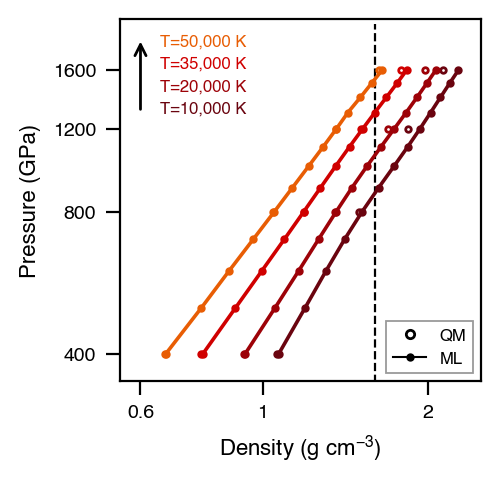

In [13]:
dens_QE_0K = np.load("../data/dens_QE_0K.npy")
dens_ML_0K = np.load("../data/dens_ML_0K.npy")

pressures_qe = np.array([400, 800, 1200, 1600])
pressures_ML = np.arange(400, 1700, 100)
temperatures = np.array([10000, 20000, 35000, 50000])

#colors_plots = ["C0", "C2", "C1", "C3"]
colors_plots = ["#6a040f", "#9d0208", "#d00000", "#e85d04"]

fig = plt.figure(figsize=(2.01, 2.01))
ax = fig.add_subplot(111)
ax.set_position((0, 0, 0.9, 0.9))

# ax.set_title("metallic H EOS")

for ii in range(0, 4, 1):
    ax.errorbar(
        dens_QE_0K[ii][:, 0],
        pressures_qe,
        xerr=dens_QE_0K[ii][:, 1],
        c=colors_plots[ii],
        linestyle="none",
        label="QM $T^i$={:.0f},000K".format(temperatures[ii] / 1e3),
        marker="o",
        ms=2,
        markerfacecolor="none",
        markeredgecolor=colors_plots[ii],
        ecolor="white",
    )

for ii in range(0, 4, 1):
    ax.errorbar(
        dens_ML_0K[ii][:, 0],
        pressures_ML,
        xerr=dens_ML_0K[ii][:, 1],
        c=colors_plots[ii],
        linestyle="-",
        label="ML $T^i$={:.0f},000K".format(temperatures[ii] / 1e3),
        marker="o",
        ms=2,
        markerfacecolor=colors_plots[ii],
        markeredgecolor=colors_plots[ii],
        ecolor="white",
    )

ax.tick_params(
    which="both",
)
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_ylim((350, 2050))
ax.set_xlim((0.55, 2.5))

ax.set_xlabel(
    "Density (g cm$^{-3}$)",
)
ax.set_ylabel(
    "Pressure (GPa)",
)

ax.minorticks_off()
ax.set_xticks([0.6, 1, 2])
ax.set_xticklabels(["0.6", "1", "2"])

ax.set_yticks([400, 800, 1200, 1600])
ax.set_yticklabels(["400", "800", "1200", "1600"])


positions = np.exp(np.linspace(np.log(1300), np.log(1800), 4))
ax.text(0.65, positions[0], "T=10,000 K", color=colors_plots[0], fontsize=6)
ax.text(0.65, positions[1], "T=20,000 K", color=colors_plots[1], fontsize=6)
ax.text(0.65, positions[2], "T=35,000 K", color=colors_plots[2], fontsize=6)
ax.text(0.65, positions[3], "T=50,000 K", color=colors_plots[3], fontsize=6)
ax.annotate(
    "",
    xytext=(0.6, positions[0] - 15),
    xy=(0.6, positions[3] + 90),
    arrowprops=dict(arrowstyle="->"),
)

lines = [
    Line2D(
        [0],
        [0],
        color="k",
        linewidth=0.0,
        linestyle="-",
        marker="o",
        ms="3",
        markerfacecolor="none",
    ),
    Line2D([0], [0], color="k", linewidth=0.75, linestyle="-", marker="o", ms=2),
]
labels = ["QM", "ML"]

legend = ax.legend(
    lines,
    labels,
    ncols=1,
    loc="lower right",
    fancybox=False,
)
legend.get_frame().set_linewidth(0.65)
ax.vlines(1.6, 275, 2000, color="k", ls="--", linewidth=0.8, clip_on=True)
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
# ax.spines["bottom"].set_position(("outward", 10))
# ax.spines["left"].set_position(("outward", 10))
# fig.tight_layout()
#plt.gcf().set_size_inches(1.9, 1.9)

fig.savefig("h_eos_ground_state.pdf", dpi=300, bbox_inches='tight', transparent=True)

## Organic Molecules

In [14]:
import numpy as np
from scipy.interpolate import RectBivariateSpline

def smooth_expand_data(x, y, z, w=2):
    """
    Expand and smoothly interpolate the provided (x, y, z) grid.

    Parameters:
        x, y, z: (N, N) input arrays
        w: Expansion factor (int), default=2

    Returns:
        expanded_x, expanded_y, expanded_z: (w*N, w*N) arrays
    """
    N = x.shape[0]
    assert x.shape == y.shape == z.shape == (N, N), "x, y, z must all have shape (N, N)"

    # Create original coordinate arrays
    xi = np.linspace(x.min(), x.max(), N)
    yi = np.linspace(y.min(), y.max(), N)

    # New expanded coordinate arrays
    xi_new = np.linspace(x.min(), x.max(), N * w)
    yi_new = np.linspace(y.min(), y.max(), N * w)

    # Interpolate x and y linearly (since these represent grids, linear interpolation suffices)
    interp_x = RectBivariateSpline(xi, yi, x, kx=1, ky=1)
    interp_y = RectBivariateSpline(xi, yi, y, kx=1, ky=1)

    expanded_x = interp_x(xi_new, yi_new)
    expanded_y = interp_y(xi_new, yi_new)

    # Smooth interpolation of z using RectBivariateSpline
    spline_z = RectBivariateSpline(xi, yi, z, kx=5, ky=5)
    expanded_z = spline_z(xi_new, yi_new)

    return expanded_x, expanded_y, expanded_z

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

fes_data = pd.read_csv("../data/fes.dat", delim_whitespace=True, comment="#", header=None)
fes_data.columns = ["CN_C_Cl", "CN_C_I", "file_free", "der_CN_C_Cl", "der_CN_C_I"]

# Reshape the data for plotting
CN_C_Cl = fes_data["CN_C_Cl"].values.reshape((49, 49))
CN_C_I = fes_data["CN_C_I"].values.reshape((49, 49))
file_free = fes_data["file_free"].values.reshape((49, 49))

x, y, z = smooth_expand_data(CN_C_Cl, CN_C_I, file_free, w=3)
z = np.clip(z, 0, None)


In [16]:
# nudged elastic band 2D
import torch

path = torch.nn.Parameter(
    torch.stack([
        torch.linspace(0.09, 0.98, 100),
        torch.linspace(0.95, 0.07, 100),
    ]).T
)

Z = torch.tensor(z.T)
X = torch.tensor(x[0, :])
Y = torch.tensor(y[:, 0])

def cn_to_x(cn):
    # there are nx points ranging from xmin to xmax
    nx = len(X)
    xmin = X[0]
    xmax = X[-1]
    # find the fractional index of the cn value
    frac_index = (cn - xmin) / (xmax - xmin) * (nx - 1)
    return frac_index
    
def cn_to_y(cn):
    # there are ny points ranging from ymin to ymax
    ny = len(Y)
    ymin = Y[0]
    ymax = Y[-1]
    # find the fractional index of the cn value
    frac_index = (cn - ymin) / (ymax - ymin) * (ny - 1)
    return frac_index


def get_energy(path):
    # convert from CN space to grid space
    grid_x = cn_to_x(path[:, 0])
    grid_y = cn_to_y(path[:, 1])
    
    # 4 way interpolation
    x_lo = torch.floor(grid_x).long()
    x_hi = torch.ceil(grid_x).long()
    y_lo = torch.floor(grid_y).long()
    y_hi = torch.ceil(grid_y).long()

    # clamp between 0 and nx-1
    x_lo = torch.clamp(x_lo, 0, len(X)-1)
    x_hi = torch.clamp(x_hi, 0, len(X)-1)
    y_lo = torch.clamp(y_lo, 0, len(Y)-1)
    y_hi = torch.clamp(y_hi, 0, len(Y)-1)
    
    # get the 4 values
    v1 = Z[x_lo, y_lo]
    v2 = Z[x_hi, y_lo]
    v3 = Z[x_lo, y_hi]
    v4 = Z[x_hi, y_hi]
    
    # get the 4 weights
    wx = torch.clamp(grid_x - x_lo, 0, 1)
    wy = torch.clamp(grid_y - y_lo, 0, 1)

    w1 = (1 - wx) * (1 - wy)
    w2 = wx * (1 - wy)
    w3 = (1 - wx) * wy
    w4 = wx * wy
    
    # interpolate
    e = w1 * v1 + w2 * v2 + w3 * v3 + w4 * v4
    return e


with torch.no_grad():
    og_energy = get_energy(path)
    d = torch.linalg.norm(path[0] - path[1])


def get_loss(path, spring_constant=1.0):
    energy = get_energy(path).sum()
    bead_separations = torch.linalg.norm(path[1:] - path[:-1], dim=1)
    sep_diff = torch.abs(bead_separations - d)
    sep_diff_with_slack = torch.clamp(sep_diff - d * slack / 100, min=0)
    bead_loss = sep_diff_with_slack.pow(2).sum()
    return energy + spring_constant * bead_loss

# optimise with Adam
optimizer = torch.optim.Adam([path], lr=0.001)
spring_constant = 100000
slack = 0  # %
for i in range(300):
    optimizer.zero_grad()
    loss = get_loss(path, spring_constant)
    loss.backward()
    if path.grad is not None:
        path.grad = path.grad.contiguous()
    optimizer.step()
    with torch.no_grad():
        path.data[0, 0] = 0.09
        path.data[0, 1] = 0.95
        path.data[-1, 0] = 0.98
        path.data[-1, 1] = 0.07
    print(loss.item())

2339.0333381940245
2335.1682007793615
2330.92567142224
2326.19018450944
2321.9481303433045
2317.8373475892495
2313.8744397572873
2309.9385702069517
2306.251919784061
2302.7805088970945
2299.3314976891816
2295.9231985434953
2292.6848986971727
2289.5640593382996
2286.4445617350543
2283.2769922985945
2279.922947622965
2276.273073317169
2272.3215725640825
2268.1422257597164
2264.0041662794397
2260.174984125474
2256.475488599914
2252.6916735482782
2249.0301515579404
2244.9267183143593
2240.833202565109
2236.998587372361
2233.247033310262
2229.550754874743
2226.047940195236
2222.6344850342393
2219.191794784236
2215.717326877765
2212.2969365186073
2208.9013949029804
2205.4821851683146
2202.0513227146494
2198.6922074404984
2195.447001055575
2192.2741413054
2189.184955530607
2186.156029797762
2183.126115854733
2180.017610150385
2176.8674765727783
2173.771920627346
2170.7350208528915
2167.7666512720098
2164.8286406326297
2161.9172842641633
2158.9919566341546
2156.0315065212235
2153.058830781747


In [17]:
with torch.no_grad():
    # plt.plot(og_energy)
    e = get_energy(path)
    # plt.plot(e)
    mep = path.detach().numpy()

np.argmax(e)

tensor(45)

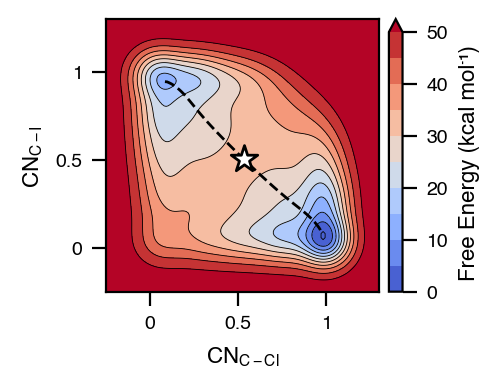

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['svg.fonttype'] = 'none'

levels = np.arange(0, 55, 5)
fig = plt.figure(figsize=(2.0, 1.77))
cont = plt.contourf(x, y, z, levels=levels, cmap="coolwarm", extend='max')
plt.contour(x, y, z, levels=levels, colors="k", linewidths=0.3)
# plt.plot([0.07, 0.45, 0.96], [0.96, 0.43, 0.08], "--ok", lw=1, ms=4)
#plt.plot(*mep.T, "k-", lw=0)

t = [0, 0.5, 1]
plt.xticks(t, t)
plt.yticks(t, t)
l = (-0.25, 1.3)
plt.xlim(l)
plt.ylim(l)
a = np.where(mep[:,0] > 0.10)[0][0] - 2
b = np.where(mep[:,0] < 0.97)[0][-1] + 2
plt.plot(*mep[a:b].T, "k--", lw=1)
plt.scatter(*mep[np.argmax(e)].T, c="white", s=100, marker="*", lw=1, edgecolor="k",zorder=10)
plt.xlabel(r"CN$\mathrm{_{C-Cl}}$")
plt.ylabel(r"CN$\mathrm{_{C-I}}$")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
CB = fig.colorbar(cont, cax=cax, extend='max', shrink=0.5, aspect=20)
CB.set_label("Free Energy (kcal mol⁻¹)")
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.set_aspect('equal', adjustable='box')
plt.savefig("painn_model_600ps.pdf", dpi=300, bbox_inches='tight', transparent=True)

## MAPI

In [19]:
phi, theta = np.loadtxt("../data/phis-thetas.txt").T
phi_fm, theta_fm = np.loadtxt("../data/phis-thetas-fm.txt").T

x = phi % 90
x = np.min([x, 90 - x], axis=0)
x = np.concatenate([x, x, -x, -x, 90-x, 90-x])

y = np.abs(theta-90)
y = np.concatenate([y, -y, y, -y, y, -y])

X = np.vstack([x, y])
kde = gaussian_kde(X, bw_method=0.1)

xx = np.linspace(0, 45, 100)
yy = np.linspace(0, 90, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = kde.pdf(np.vstack([XX.ravel(), YY.ravel()]))
ZZ = ZZ.reshape(XX.shape)

x = phi_fm % 90
x = np.min([x, 90 - x], axis=0)
x = np.concatenate([x, x, -x, -x, 90-x, 90-x])

y = np.abs(theta_fm-90)
y = np.concatenate([y, -y, y, -y, y, -y])

X = np.vstack([x, y])
kde2 = gaussian_kde(X, bw_method=0.1)

xx = np.linspace(0, 45, 100)
yy = np.linspace(0, 90, 100)
XX2, YY2 = np.meshgrid(xx, yy)
ZZ2 = kde2.pdf(np.vstack([XX2.ravel(), YY2.ravel()]))
ZZ2 = ZZ2.reshape(XX2.shape)

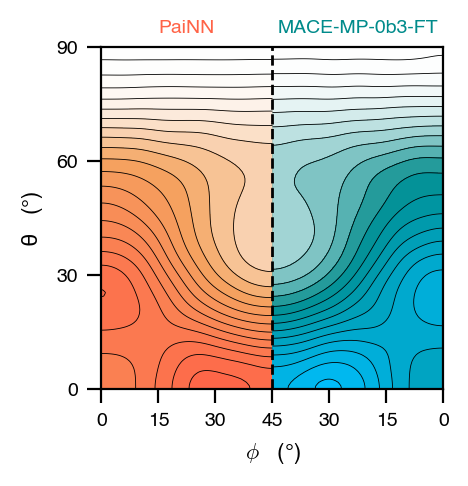

In [20]:
cmap = LinearSegmentedColormap.from_list("one", ["white", "sandybrown", "tomato"])
values = cmap(np.linspace(0, 1, 256))
values[:, -1] = np.clip(np.linspace(0, 2, 256) ** 1.5, 0, 1)
cmap = ListedColormap(values)

fig = plt.figure(figsize=(1.9, 1.9))
ax = fig.add_subplot(111)
ax.set_position((0, 0, 0.9, 0.9))

levels = 21

zmin = np.quantile(ZZ, 0.01)
ax.contourf(XX, YY, np.clip(ZZ, zmin, None), levels=levels, cmap=cmap)
ax.contour(XX, YY, np.clip(ZZ, zmin, None), levels=levels, colors="k", linewidths=0.3)


# cmap = plt.cm.cividis
cmap = LinearSegmentedColormap.from_list("one", ["white", "darkcyan", "deepskyblue"])
values = cmap(np.linspace(0, 1, 256))
values[:, -1] = np.clip(np.linspace(0, 1.8, 256) ** 1.5, 0, 1)
cmap = ListedColormap(values)
zmin2 = np.quantile(ZZ2, 0.01)
ax.contourf(90 - XX2, YY2, np.clip(ZZ2, zmin2, None), levels=levels, cmap=cmap)
ax.contour(
    90 - XX2, YY2, np.clip(ZZ2, zmin2, None), levels=levels, colors="k", linewidths=0.3
)

ax.axvline(45, color="k", linewidth=1, ls="--")
t = [0, 30, 60, 90]
ax.set_yticks(t, t)
ax.set_xticks([0, 15, 30, 45, 60, 75, 90], [0, 15, 30, 45, 30, 15, 0])

ax.set_xlabel(r"$\mathrm{\phi \quad (\degree)}$")
ax.set_ylabel(r"$\mathrm{\theta \quad (\degree)}$")
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)

ax.text(22.5, 95, "PaiNN", fontsize=7, ha="center", va="center", color="tomato")
ax.text(45 + 45 / 2, 95, "MACE-MP-0b3-FT", fontsize=7, ha="center", va="center", color="darkcyan")
plt.savefig("mapi-kde.pdf", dpi=300, bbox_inches='tight', transparent=True)

# Figure 6

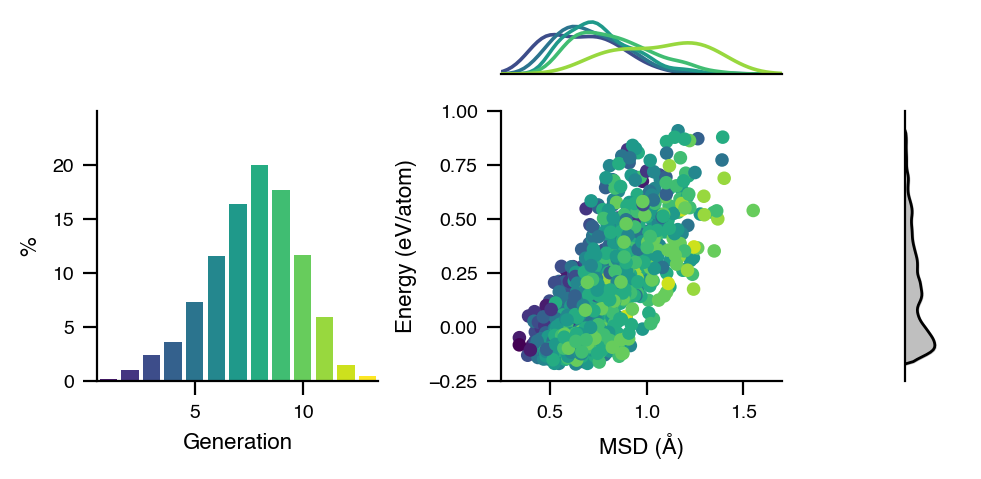

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

df = pd.read_csv("../data/augment-atoms.csv")
df.energy -= df.energy[0]

def hist(x):
    counts = np.bincount(x).astype(float)
    counts /= counts.sum() / 100
    return range(len(counts)), counts

def kde_plot(x, ax, swap=False, **kwargs):
    kde = gaussian_kde(x)
    x = np.linspace(x.min() - 0.5, x.max() + 1, 100)
    y = kde(x)
    if swap:
        x, y = y, x
    ax.plot(x, y, **kwargs)
    ax.set_ylim(0, max(y) + 0.01)
    return max(y)

# 2x3 grid of plt subplots, with width ratio 1:1:0.2 and height ratio 1:0.2
fig, axs = plt.subplots(
    2,
    3,
    figsize=(5, 2.5),
    gridspec_kw={"width_ratios": [1, 1, 0.2], "height_ratios": [0.2, 1.0]},
)

left = axs[1, 0]
mid = axs[1, 1]
right = axs[1, 2]
top = axs[0, 1]

for ax in axs.flatten():
    if ax not in [top, left, mid, right]:
        ax.set_visible(False)

colors = plt.cm.viridis(np.linspace(0, 1, df["generation"].max()))
left.bar(*hist(df["generation"]), color=colors)
left.set_xlabel("Generation")
left.set_ylabel("%")
left.set_yticks([0, 5, 10, 15, 20])
for dir in "top", "right":
    left.spines[dir].set_visible(False)
left.set_xlim(0.5, df["generation"].max() - 0.5)

mid.scatter(
    df.msd[1:],
    df["energy"][1:],
    c=df["generation"][1:],
    cmap="viridis",
    s=15,
    rasterized=True,
)

mid.set_xlabel("MSD (Å)")
mid.set_ylabel("Energy (eV/atom)")
for dir in "top", "right":
    mid.spines[dir].set_visible(False)
mid.set_ylim(-0.25, 1)
mid.set_xlim(0.25, 1.7)
ylim = mid.get_ylim()
xlim = mid.get_xlim()

kde = gaussian_kde(df.energy, bw_method=0.1)
y = np.linspace(df.energy.min(), df.energy.max(), 100)
x = kde(y)
x[0] = 0
x[-1] = 0
right.plot(x, y, color="black", lw=1)
right.fill_betweenx(y, x, -1, color="grey", alpha=0.5)
for dir in "top", "bottom", "right":
    right.spines[dir].set_visible(False)
right.set_ylim(ylim)
right.set_xlim(left=0)
right.set_yticks([], [])
right.set_xticks([], [])


for dir in "top", "right", "left":
    top.spines[dir].set_visible(False)
a = []
for level in (4, 6, 8, 10, 12):
    a.append(kde_plot(df.msd[1:][df.generation[1:] == level], top, color=colors[level-1]))
    # set the ylim to the range of the data
top.set_ylim(0, max(a) + 0.1)
top.set_xlim(xlim)
top.set_xticks([], [])
top.set_yticks([], [])

plt.tight_layout()
plt.savefig("protocol.svg", bbox_inches="tight", transparent=True, dpi=600)